## Generate all the images:

Watch out to homogenize the images:

1. Specify the writing style for all texts in the figure
2. Get rid of all the title headers and comment them out
3. All the axis titles in small (not capital) letters
4. $/year and not USD/ year
5. make sure that axis titles are clear

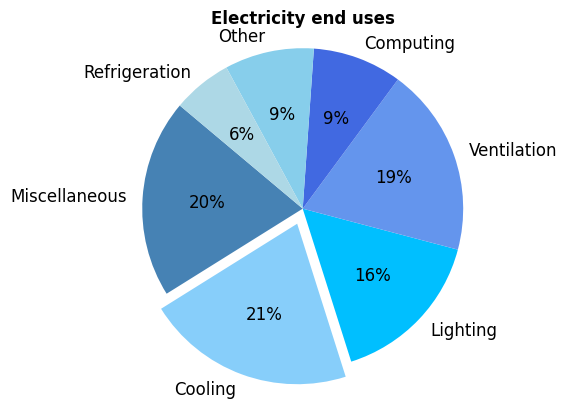

In [6]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Miscellaneous', 'Cooling', 'Lighting', 'Ventilation', 'Computing', 'Other', 'Refrigeration']
sizes = [20, 21, 16, 19, 9, 9, 6]

# Explode the largest slice (Cooling)
explode = (0, 0.1, 0, 0, 0, 0, 0)  

# Blue color palette
colors = ['steelblue', 'lightskyblue', 'deepskyblue', 'cornflowerblue', 'royalblue', 'skyblue', 'lightblue']

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
                                  startangle=140, colors=colors)

# Add a title
plt.title(f'Electricity end uses', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Improve text readability
for text in texts + autotexts:
    text.set_fontsize(12)

plt.show()

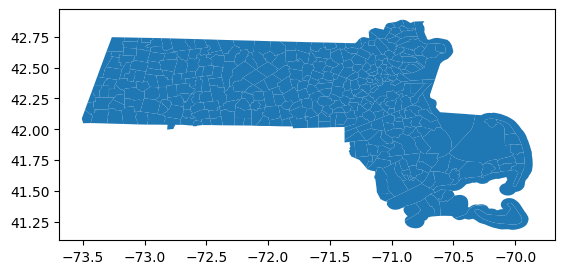

,geometry
0,"POLYGON ((-71.49701 42.2899, -71.4968 42.29031..."
1,"POLYGON ((-73.46017 42.21765, -73.45952 42.219..."
2,"POLYGON ((-73.33362 42.3689, -73.33078 42.3690..."
3,"POLYGON ((-73.27355 42.59088, -73.27344 42.591..."
4,"POLYGON ((-73.1621 42.19703, -73.16208 42.1987..."


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile = gpd.read_file('tl_2023_25_cousub.shp') 

# Display the shapefile
shapefile.plot()
plt.show()

shapefile.head()

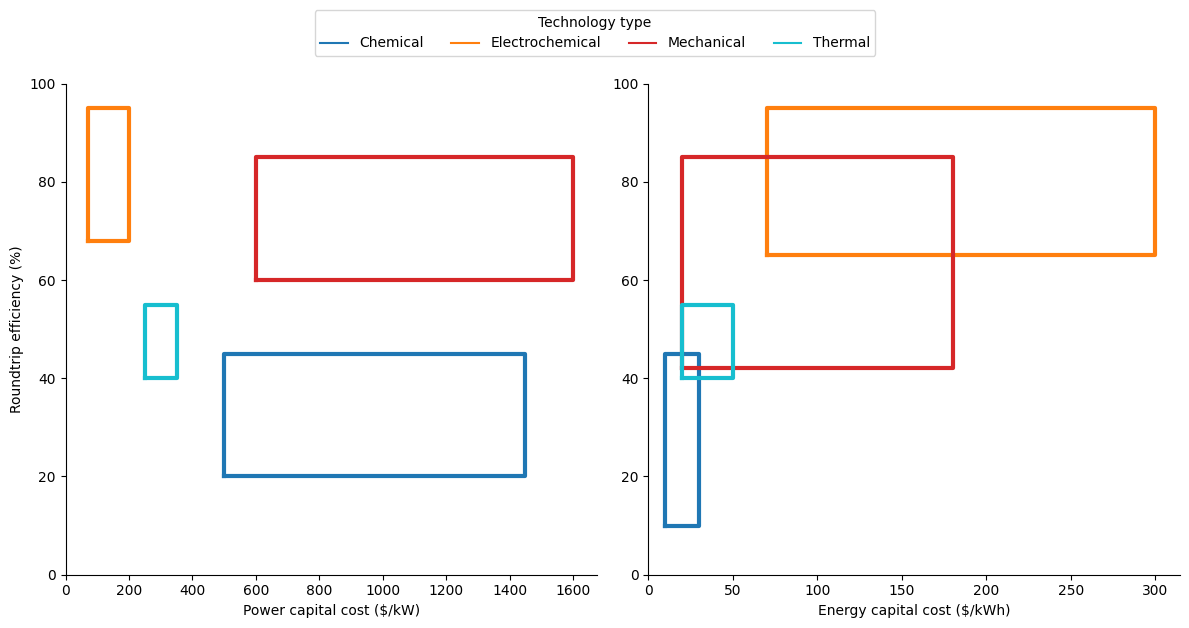

In [15]:
import matplotlib.pyplot as plt

# Data for the plot (including all 4 points for each rectangle)
# Note: The first and last points of each rectangle now have the same x-coordinate
power_cost = {
    "Chemical": [[500, 20], [1450, 20], [1450, 45], [500, 45], [500, 20]],  # Close the loop
    "Electrochemical": [[70, 68], [200, 68], [200, 95], [70, 95], [70, 68]],  # Close the loop
    "Mechanical": [[600, 60], [1600, 60], [1600, 85], [600, 85], [600, 60]],  # Close the loop
    "Thermal": [[250, 40], [350, 40], [350, 55], [250, 55], [250, 40]],  # Close the loop
}
energy_cost = {
    "Chemical": [[10, 10], [30, 10], [30, 45], [10, 45], [10, 10]],  # Close the loop
    "Electrochemical": [[70, 65], [300, 65], [300, 95], [70, 95], [70, 65]],  # Close the loop
    "Mechanical": [[20, 42], [180, 42], [180, 85], [20, 85], [20, 42]],  # Close the loop
    "Thermal": [[20, 40], [50, 40], [50, 55], [20, 55], [20, 40]],  # Close the loop
}
colors = {
    "Chemical": "tab:blue",
    "Electrochemical": "tab:orange",
    "Mechanical": "tab:red",
    "Thermal": "tab:cyan",
}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data
for tech_type in power_cost:
    x_coords, y_coords = zip(*power_cost[tech_type])  # Unpack coordinates
    ax1.plot(x_coords, y_coords, color=colors[tech_type], linewidth=3)

    x_coords, y_coords = zip(*energy_cost[tech_type])  # Unpack coordinates
    ax2.plot(x_coords, y_coords, color=colors[tech_type], linewidth=3)

# Remove the top and right spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Set axis labels and titles
ax1.set_xlabel("Power capital cost ($/kW)")
ax1.set_ylabel("Roundtrip efficiency (%)")
ax2.set_xlabel("Energy capital cost ($/kWh)")

# Add a legend at the top
handles = [
    plt.Line2D([], [], color=colors[tech_type], label=tech_type)
    for tech_type in colors
]
fig.legend(handles=handles, title="Technology type", loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.05))

# Set axis limits to start at 0
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0, top=100)
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0, top=100)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\technologies_densities.png", dpi=300, bbox_inches='tight')


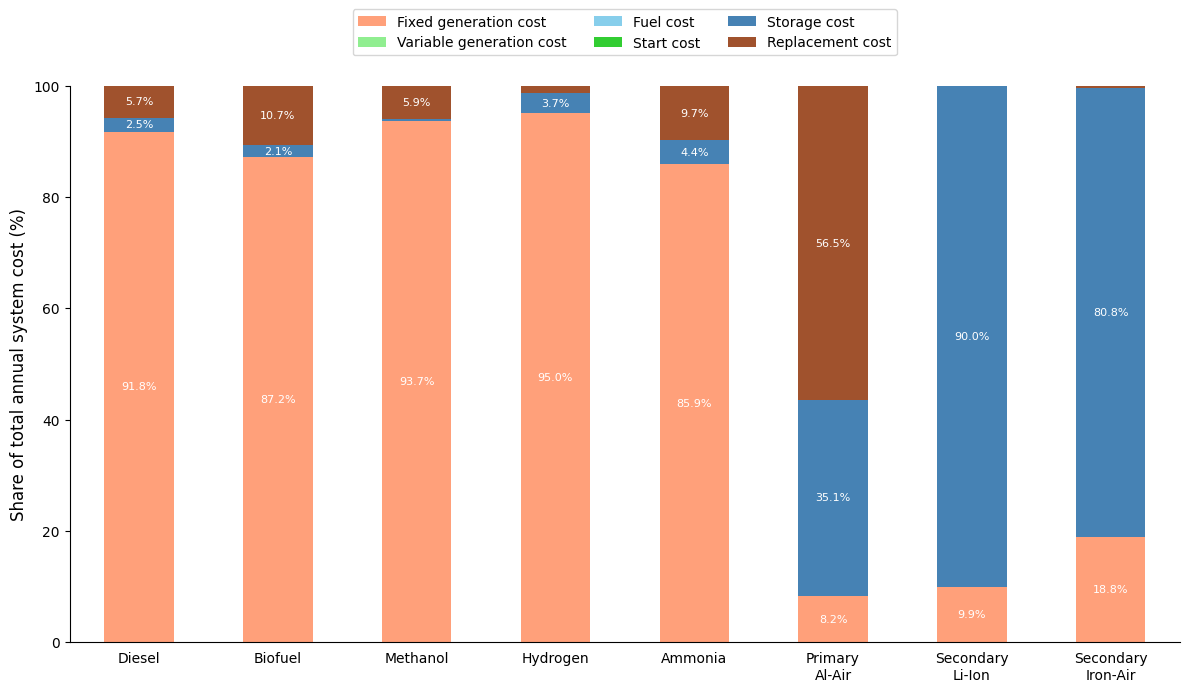

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Data
data = {
    "Technology": ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"],
    "Fixed generation cost": [109688, 119916, 436681, 366109, 140767, 24391, 60386, 39360],
    "Variable generation cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Fuel cost": [4, 4, 4, 3, 5, 402, 3, 4],
    "Start cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Storage cost": [2976, 2916, 1861, 14256, 7178, 104097, 550602, 168999],
    "Replacement cost": [6841, 14706, 27329, 4825, 15941, 167292, 526, 861],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set Technology as index
df.set_index("Technology", inplace=True)

# Normalize the data so each column sums to 100%
df_normalized = df.div(df.sum(axis=1), axis=0) * 100

# Wrap long names to prevent overlap
wrapped_labels = [textwrap.fill(label, 10) for label in df.index]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

# Stacked bar plot
df_normalized.plot(kind='bar', stacked=True, ax=ax, color=["#FFA07A", "#90EE90", "#87CEEB", "#32CD32", "#4682B4", "#A0522D"])

# Add labels and title
ax.set_ylabel("Share of total annual system cost (%)", fontsize=12)
ax.set_xlabel("")
#ax.set_title("Normalized Cost Structure for Different Technologies", fontsize=14)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels to horizontal and use wrapped labels
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')
ax.xaxis.set_ticks_position('none')

# Add values to the bars, excluding labels smaller than 2%
for container in ax.containers:
    labels = [f"{w:.1f}%" if w > 2 else "" for w in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white')


# Place the legend above the plot
ax.legend(title="", loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout for better display
plt.tight_layout(rect=[0, 0, 1, 1])

ax.set_ylim(0, 100)

# Show plot
plt.show()






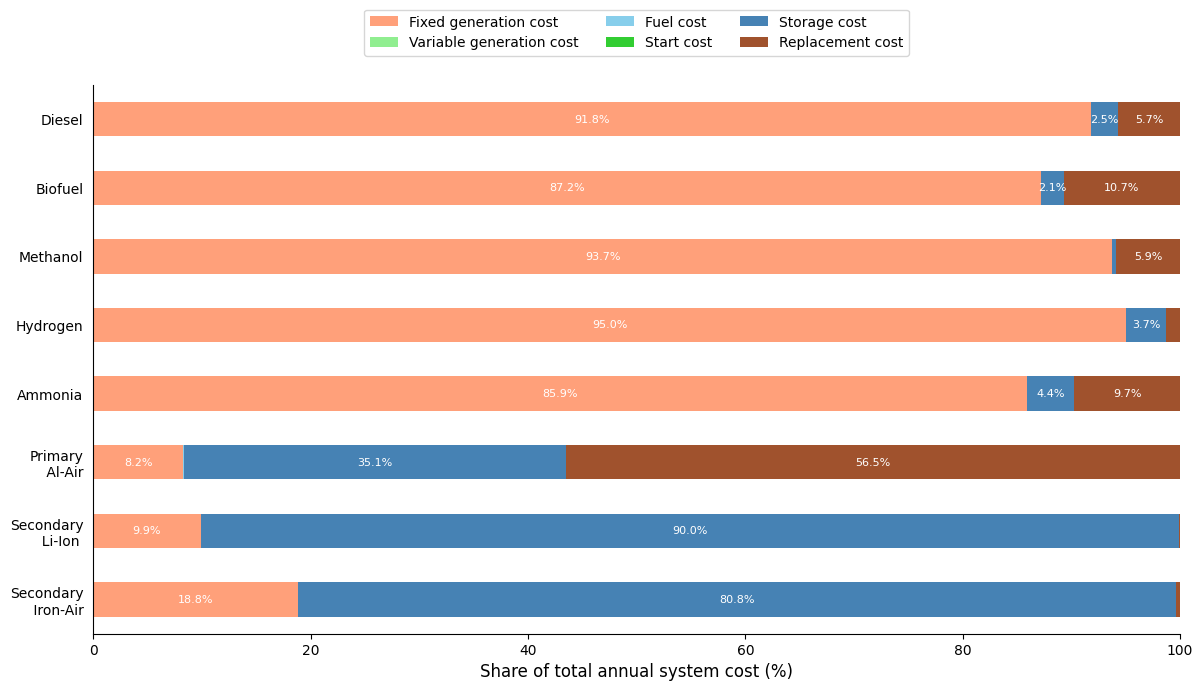

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Data
data = {
    "Technology": ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"],
    "Fixed generation cost": [109688, 119916, 436681, 366109, 140767, 24391, 60386, 39360],
    "Variable generation cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Fuel cost": [4, 4, 4, 3, 5, 402, 3, 4],
    "Start cost": [0, 0, 0, 0, 0, 0, 0, 0],
    "Storage cost": [2976, 2916, 1861, 14256, 7178, 104097, 550602, 168999],
    "Replacement cost": [6841, 14706, 27329, 4825, 15941, 167292, 526, 861],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set Technology as index
df.set_index("Technology", inplace=True)

# Normalize the data so each column sums to 100%
df_normalized = df.div(df.sum(axis=1), axis=0) * 100

def wrap_and_center(label, width):
    lines = textwrap.fill(label, width).split("\n")
    max_width = max(len(line) for line in lines)
    centered_lines = [line.center(max_width) for line in lines]
    return "\n".join(centered_lines)

wrapped_labels = [wrap_and_center(label, 10) for label in df.index]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

# Stacked bar plot
df_normalized[::-1].plot(kind='barh', stacked=True, ax=ax, color=["#FFA07A", "#90EE90", "#87CEEB", "#32CD32", "#4682B4", "#A0522D"])


# Remove y-axis ticks and labels, but keep technology names next to the bars
ax.set_yticks(range(len(df_normalized.index)))
ax.set_yticklabels(wrapped_labels[::-1], rotation=0, ha='right', fontsize=10)
ax.tick_params(axis='y', left=False)

# Add labels and title
ax.set_xlabel("Share of total annual system cost (%)", fontsize=12)
ax.set_ylabel("")
#ax.set_title("Normalized Cost Structure for Different Technologies", fontsize=14)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.xaxis.set_ticks_position('none')

# Add values to the bars, excluding labels smaller than 2%
for container in ax.containers:
    labels = [f"{w:.1f}%" if w > 2 else "" for w in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white')


# Place the legend above the plot
ax.legend(title="", loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=10)

# Adjust layout for better display
plt.tight_layout(rect=[0, 0, 1, 1])

ax.set_xlim(0, 100)

# Show plot
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\cost_structure_8h_v2.png", dpi=300, bbox_inches='tight')

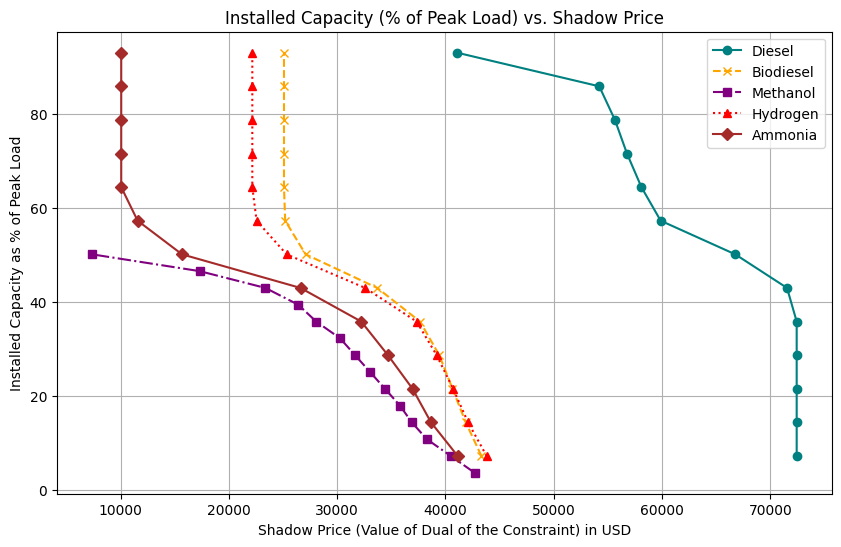

In [ ]:
import matplotlib.pyplot as plt

# Data for Diesel generator
diesel_dual = [
    72432.60346, 72432.60346, 72432.60337, 72432.60328, 72432.60268,
    71543.45135, 66764.27263, 59873.36648, 58095.05242, 56761.30934,
    55649.87205, 54205.00416, 41090.96249
]
diesel_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61,
    78.77, 85.93, 93.09
]

# Data for Biodiesel generator
biodiesel_dual = [
    43320.28051, 41875.41278, 40652.8319, 39430.23241, 37651.91835,
    33706.31836, 27091.14163, 25203.82724, 25092.68172, 25092.68146,
    25092.68137, 25092.68137, 25092.68137
]
biodiesel_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61,
    78.77, 85.93, 93.09
]

# Data for Methanol fuel cell
methanol_dual = [
    42689.88021, 40482.90796, 38275.93531, 36896.5774, 35793.0914, 34413.73383,
    33034.37627, 31655.01876, 30275.66122, 28068.68926, 26413.46027, 23378.87375,
    17309.7009, 7378.327404
]
methanol_percent = [
    3.58, 7.16, 10.74, 14.32, 17.90, 21.48, 25.06, 28.64, 32.22, 35.80, 39.38,
    42.96, 46.54, 50.12
]

# Data for Hydrogen fuel cell
hydrogen_dual = [
    43803.59745, 42088.61004, 40704.93342, 39186.32356, 37339.41395, 32590.21801,
    25334.5011, 22564.10708, 22168.29228, 22168.2661, 22168.22303, 22168.22303,
    22168.22303
]
hydrogen_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61, 78.77,
    85.93, 93.09
]

# Data for Ammonia generator
ammonia_dual = [
    41128.49758, 38666.01588, 36961.21977, 34688.13089, 32225.61211, 26621.47381,
    15679.23207, 11578.65112, 10063.27384, 10063.27301, 10063.27281, 10063.27273,
    10063.27273
]
ammonia_percent = [
    7.16, 14.32, 21.48, 28.64, 35.80, 42.96, 50.12, 57.29, 64.45, 71.61, 78.77,
    85.93, 93.09
]

# Data for Primary batteries
#primary_battery_dual = [
#    24352.23341, 23148.03695, 22579.41119, 22502.07065, 19033.76676, 18931.14165,
#    15488.12106, 15488.12106, 11852.17905, 9145.734094, 7091.570833, 6445.682354,
#    6445.682354
#]
#primary_battery_percent = [
#    0.651, 1.302, 1.953, 2.604, 3.255, 3.906, 4.557, 5.208, 5.859, 6.510, 7.161,
#    7.812, 8.463
#]


# Create the plot
plt.figure(figsize=(10, 6))

# Plot Diesel data
plt.plot(diesel_dual, diesel_percent, marker='o', linestyle='-', color='teal', label='Diesel')

# Plot Biodiesel data
plt.plot(biodiesel_dual, biodiesel_percent, marker='x', linestyle='--', color='orange', label='Biodiesel')

# Plot Methanol data
plt.plot(methanol_dual, methanol_percent, marker='s', linestyle='-.', color='purple', label='Methanol')

# Plot Hydrogen data
plt.plot(hydrogen_dual, hydrogen_percent, marker='^', linestyle=':', color='red', label='Hydrogen')

# Plot Ammonia data
plt.plot(ammonia_dual, ammonia_percent, marker='D', linestyle='-', color='brown', label='Ammonia')

# Plot Primary battery data
#plt.plot(primary_battery_dual, primary_battery_percent, marker='*', linestyle='-', color='green', label='Primary Battery')


# Customize the plot
#plt.title('Installed Capacity (% of Peak Load) vs. Shadow Price')
plt.xlabel('Annual shadow price (equal to the dual value of the donstraint) in $/year')
plt.ylabel('Share of installed capacity relative to peak load (%)')
plt.grid(False)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()  # Add a legend to distinguish the lines

# Show the plot
plt.show()

fig.savefig(r"C:\Users\jonas\OneDrive\Dokumente\EPFL École polytéchnique de Lausanne\Cours\MA4\MIT Master Thesis\Work\Results\Plots\sensitivity_analysis.png", dpi=300, bbox_inches='tight')

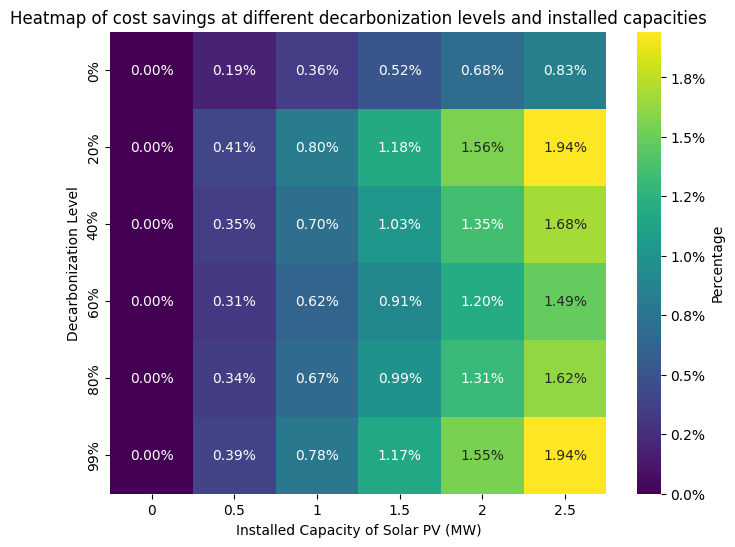

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Your data as a NumPy array
data = np.array([
    [0, 0.001875, 0.003556, 0.005175, 0.006788, 0.008311],
    [0, 0.00406, 0.008044, 0.011826, 0.015595, 0.019365],
    [0, 0.003525, 0.006984, 0.010268, 0.013541, 0.016814],
    [0, 0.003123, 0.00619, 0.009099, 0.011982, 0.014857],
    [0, 0.003418, 0.006665, 0.009892, 0.013097, 0.016208],
    [0, 0.003884, 0.007769, 0.011653, 0.015537, 0.019422]
])

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
ax = sns.heatmap(data, annot=True, fmt=".2%", cmap="viridis", cbar_kws={'label': 'Percentage'})

# Set axis labels and title
plt.xlabel("Installed Capacity of Solar PV (MW)")
plt.ylabel("Decarbonization Level")
plt.title("Heatmap of cost savings at different decarbonization levels and installed capacities")

# Define the x-axis and y-axis markers
x_markers = [0, 0.5, 1, 1.5, 2, 2.5]
y_markers = ["0%", "20%", "40%", "60%", "80%", "99%"] 

# Set x and y ticks with the defined markers
ax.set_xticks(np.arange(len(x_markers)) + 0.5, minor=False)  # Shift x ticks by 0.5
ax.set_xticklabels(x_markers)
ax.set_yticks(np.arange(len(y_markers)) + 0.5, minor=False)  # Shift y ticks by 0.5
ax.set_yticklabels(y_markers)

# Format the colorbar tick labels as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1%}'))


# Show the plot
plt.show()

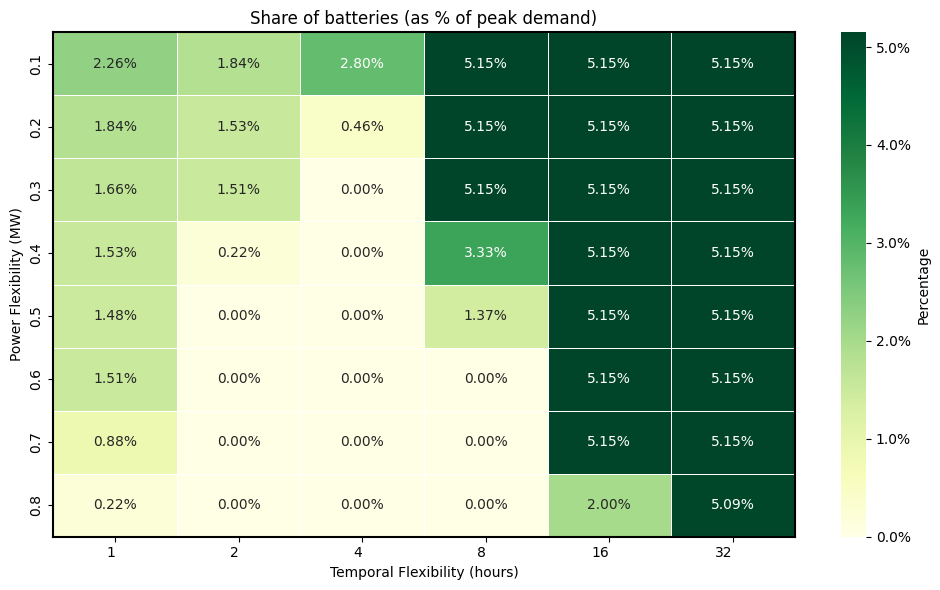

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

# Your data as a NumPy array
data = np.array([
    [0.0226, 0.0184, 0.0280, 0.0515, 0.0515, 0.0515],
    [0.0184, 0.0153, 0.0046, 0.0515, 0.0515, 0.0515],
    [0.0166, 0.0151, 0.0000, 0.0515, 0.0515, 0.0515],
    [0.0153, 0.0022, 0.0000, 0.0333, 0.0515, 0.0515],
    [0.0148, 0.0000, 0.0000, 0.0137, 0.0515, 0.0515],
    [0.0151, 0.0000, 0.0000, 0.0000, 0.0515, 0.0515],
    [0.0088, 0.0000, 0.0000, 0.0000, 0.0515, 0.0515],
    [0.0022, 0.0000, 0.0000, 0.0000, 0.0200, 0.0509]
])

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.heatmap(data, annot=True, fmt=".2%", cmap="YlGn", cbar_kws={'label': 'Percentage'}, linewidths=0.5)

# Create a custom colormap between the specified colors
#custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_green", ["#c8ecc4", "#38a454"])

# Create the heatmap using the custom colormap
#plt.figure(figsize=(10, 6))  # Adjust figure size if needed
#ax = sns.heatmap(data, annot=True, fmt=".2%", cmap=custom_cmap, cbar_kws={'label': 'Percentage'}, linewidths=0.5)

# Set axis labels and title
plt.xlabel("Temporal Flexibility (hours)")
plt.ylabel("Power Flexibility (MW)")
plt.title("Share of batteries (as % of peak demand)")

# Define the x-axis and y-axis markers
x_markers = ["1", "2", "4", "8", "16", "32"]
y_markers = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]

# Set x and y ticks with the defined markers
ax.set_xticks(np.arange(len(x_markers)) + 0.5, minor=False)  # Center x ticks
ax.set_xticklabels(x_markers, rotation=0, ha="right")
ax.set_yticks(np.arange(len(y_markers)) + 0.5, minor=False)  # Center y ticks
ax.set_yticklabels(y_markers)

# Format the colorbar tick labels as percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1%}'))

# Add a border around the heatmap
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


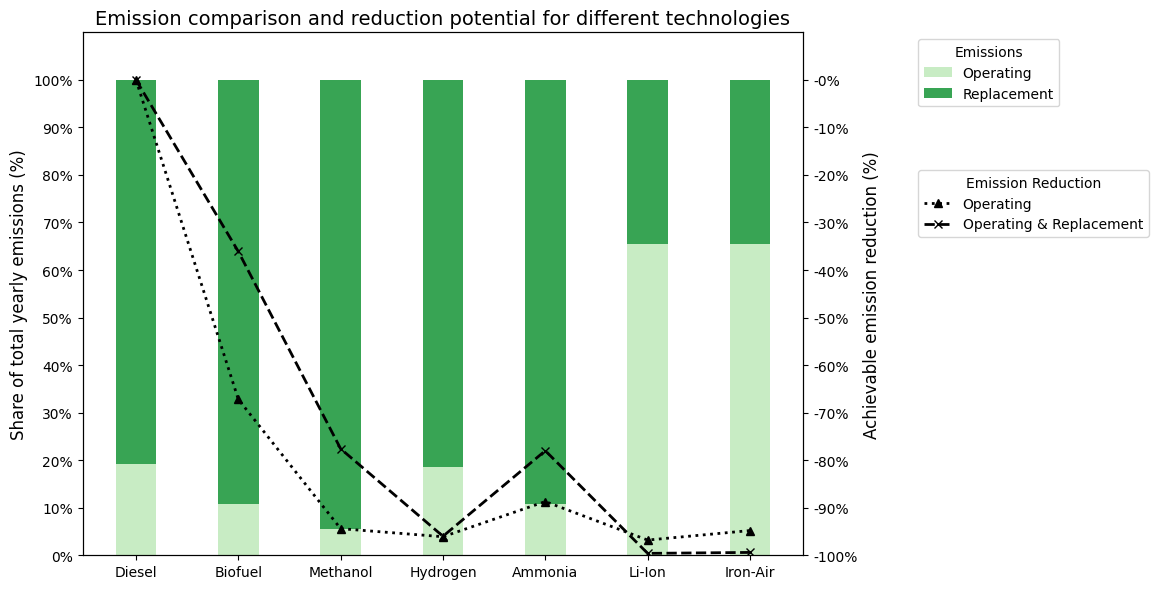

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data
categories = ['Diesel', 'Biofuel', 'Methanol', 'Hydrogen', 'Ammonia', 'Li-Ion', 'Iron-Air']
operating_emission_reduction = [0.0, -0.672, -0.944, -0.961, -0.887, -0.968, -0.948]  # Operating emission reduction
operating_and_replacement_reduction = [0.0, -0.361, -0.776, -0.960, -0.780, -0.996, -0.994]  # Combined reduction
share_replacement_emissions = [0.809, 0.892, 0.944, 0.815, 0.892, 0.345, 0.345]  # Share of replacement emissions

# Convert share of replacement emissions to total yearly emissions for stacked bar
share_operation_emissions = [1 - s for s in share_replacement_emissions]

# Bar width
bar_width = 0.4

# Create the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stacked bar chart
bar_positions = np.arange(len(categories))
ax1.bar(bar_positions, share_operation_emissions, bar_width, label='Operation Emissions', color='#c8ecc4')
ax1.bar(bar_positions, share_replacement_emissions, bar_width, bottom=share_operation_emissions, label='Replacement Emissions', color='#38a454')

# Format primary y-axis
ax1.set_ylabel('Share of total yearly emissions (%)', fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(categories, rotation=0, ha='center')

# Format y-axis to display percentages
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add secondary y-axis for emission reductions
ax2 = ax1.twinx()
ax2.plot(bar_positions, operating_emission_reduction, label='Operating Emission Reduction', color='black', marker='^', linestyle=':', linewidth=2)
ax2.plot(bar_positions, operating_and_replacement_reduction, label='Operating & Replacement Reduction', color='black', marker='x', linestyle='--', linewidth=2)

# Format secondary y-axis
ax2.set_ylabel('Achievable emission reduction (%)', fontsize=12)
ax2.set_ylim(-1, 0.1)
ax2.set_yticks(np.arange(-1, 0.1, 0.1))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add legends
#fig.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=10)

# Legend for the bar chart (Emissions)
emissions_legend = ax1.legend(
    loc='upper left', bbox_to_anchor=(1.15, 1), title="Emissions", fontsize=10, labels=["Operating", "Replacement"]
)

# Legend for the line chart (Emission Reductions)
reductions_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.15, 0.75), title="Emission Reduction", fontsize=10, labels=["Operating", "Operating & Replacement"]
)
# Title
plt.title('Emission comparison and reduction potential for different technologies', fontsize=14)

# Grid
#ax1.grid(visible=True, linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()




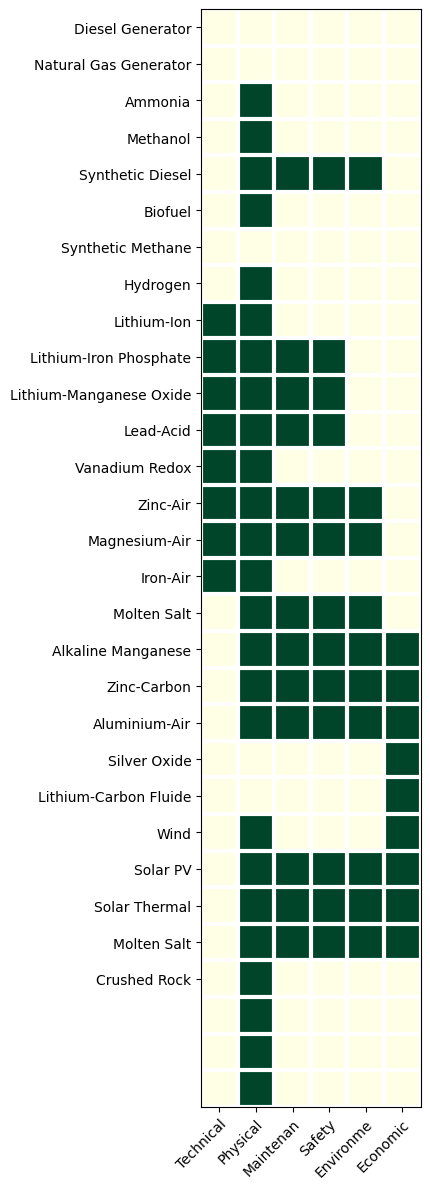

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the heatmap (replace with your actual data)
data = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
])

# Labels for the x and y axes
x_labels = ["Technical", "Physical", "Maintenan", "Safety", "Environme", "Economic"]
y_labels = [
    "Diesel Generator",
    "Natural Gas Generator",
    "Ammonia",
    "Methanol",
    "Synthetic Diesel",
    "Biofuel",
    "Synthetic Methane",
    "Hydrogen",
    "Lithium-Ion",
    "Lithium-Iron Phosphate",
    "Lithium-Manganese Oxide",
    "Lead-Acid",
    "Vanadium Redox",
    "Zinc-Air",
    "Magnesium-Air",
    "Iron-Air",
    "Molten Salt",
    "Alkaline Manganese",
    "Zinc-Carbon",
    "Aluminium-Air",
    "Silver Oxide",
    "Lithium-Carbon Fluide",
    "Wind",
    "Solar PV",
    "Solar Thermal",
    "Molten Salt",
    "Crushed Rock",
]

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 12))  # Adjust figsize as needed
im = ax.imshow(data, cmap="YlGn")

# Set axis labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels) 


# Rotate x-axis labels if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add grid lines
ax.set_xticks(np.arange(data.shape[1] + 1) - .5, minor=True)
ax.set_yticks(np.arange(data.shape[0] + 1) - .5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)


# Show the plot
plt.tight_layout()
plt.show()

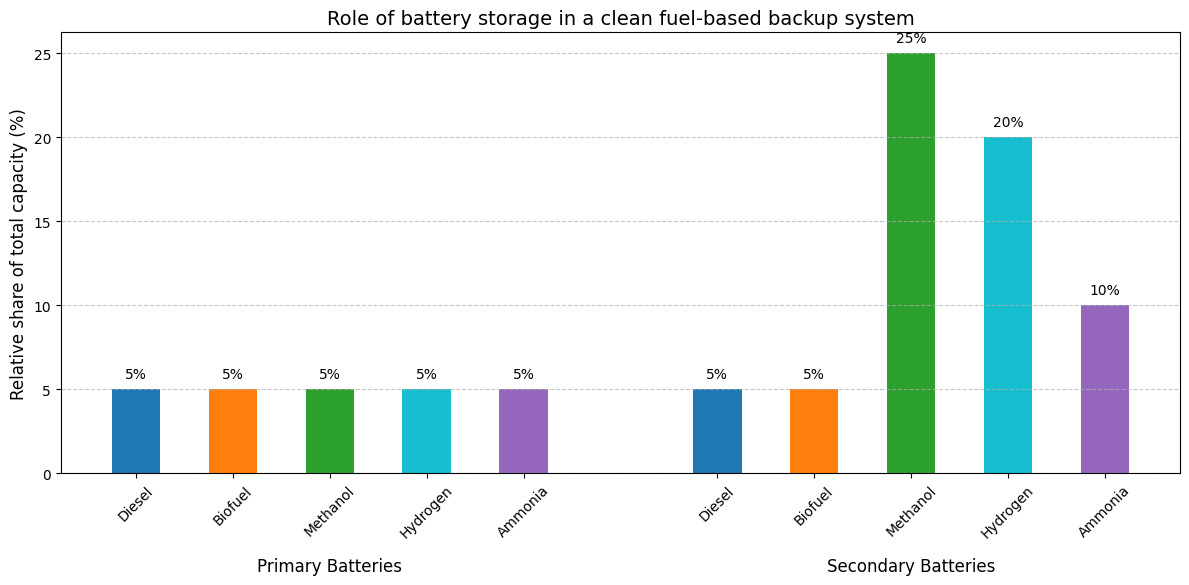

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Diesel', 'Biofuel', 'Methanol', 'Hydrogen', 'Ammonia']
primary_share = [5, 5, 5, 5, 5]  # Values for primary batteries
secondary_share = [5, 5, 25, 20, 10]  # Values for secondary batteries

x_primary = np.arange(len(categories))  # Positions for primary batteries
x_secondary = x_primary + len(categories) + 1  # Positions for secondary batteries

width = 0.5  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot primary batteries
bars_primary = ax.bar(
    x_primary, primary_share, width, label='Primary batteries',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd']
)

# Plot secondary batteries
bars_secondary = ax.bar(
    x_secondary, secondary_share, width, label='Secondary batteries',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd']
)

# Labeling
ax.set_title('Role of battery storage in a clean fuel-based backup system', fontsize=14)
ax.set_ylabel('Relative share of total capacity (%)', fontsize=12)

# Define tick positions and labels
x_ticks = np.concatenate([x_primary, x_secondary])
x_labels = categories + categories
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, fontsize=10)

# Add labels under each group
ax.text(len(categories) / 2 - 0.5, -5, 'Primary Batteries', ha='center', va='top', fontsize=12)
ax.text(len(categories) + len(categories) / 2 + 0.5, -5, 'Secondary Batteries', ha='center', va='top', fontsize=12)

# Add percentage values above the bars
for bar in bars_primary:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}%', ha='center', va='bottom', fontsize=10)

for bar in bars_secondary:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}%', ha='center', va='bottom', fontsize=10)

# Add a legend and grid
#ax.legend(fontsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for labels
plt.tight_layout()
plt.show()




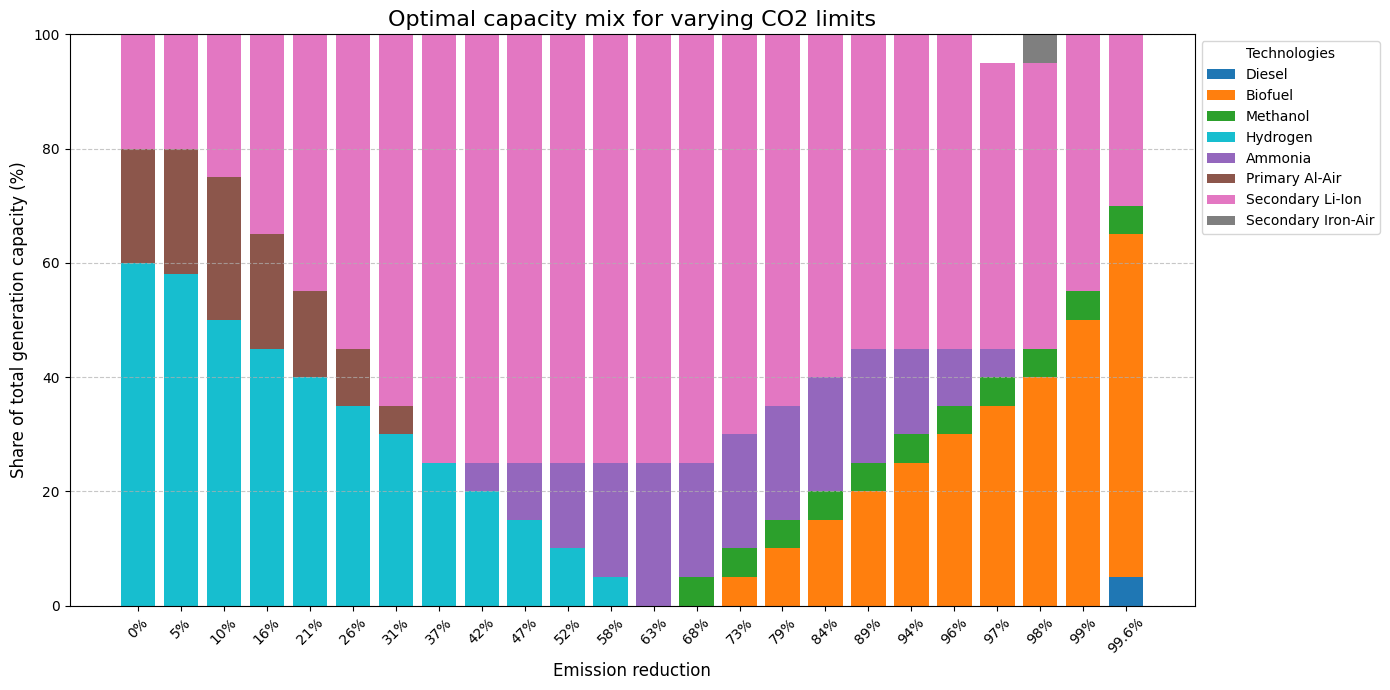

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
emission_reduction = [
    "0%", "5%", "10%", "16%", "21%", "26%", "31%", "37%", "42%", "47%", "52%", "58%", "63%",
    "68%", "73%", "79%", "84%", "89%", "94%", "96%", "97%", "98%", "99%", "99.6%"
]

categories = [
    "Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", 
    "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"
]

# Random example data (share of each category in total generation capacity per emission reduction target)
data = np.array([
    [0, 0, 0, 60, 0, 20, 20, 0],   # 0%
    [0, 0, 0, 58, 0, 22, 20, 0],   # 5%
    [0, 0, 0, 50, 0, 25, 25, 0],   # 10%
    [0, 0, 0, 45, 0, 20, 35, 0],   # 16%
    [0, 0, 0, 40, 0, 15, 45, 0],   # 21%
    [0, 0, 0, 35, 0, 10, 55, 0],   # 26%
    [0, 0, 0, 30, 0, 5, 65, 0],    # 31%
    [0, 0, 0, 25, 0, 0, 75, 0],    # 37%
    [0, 0, 0, 20, 5, 0, 75, 0],    # 42%
    [0, 0, 0, 15, 10, 0, 75, 0],   # 47%
    [0, 0, 0, 10, 15, 0, 75, 0],   # 52%
    [0, 0, 0, 5, 20, 0, 75, 0],    # 58%
    [0, 0, 0, 0, 25, 0, 75, 0],    # 63%
    [0, 0, 5, 0, 20, 0, 75, 0],    # 68%
    [0, 5, 5, 0, 20, 0, 70, 0],    # 73%
    [0, 10, 5, 0, 20, 0, 65, 0],   # 79%
    [0, 15, 5, 0, 20, 0, 60, 0],   # 84%
    [0, 20, 5, 0, 20, 0, 55, 0],   # 89%
    [0, 25, 5, 0, 15, 0, 55, 0],   # 94%
    [0, 30, 5, 0, 10, 0, 55, 0],   # 96%
    [0, 35, 5, 0, 5, 0, 50, 0],    # 97%
    [0, 40, 5, 0, 0, 0, 50, 5],    # 98%
    [0, 50, 5, 0, 0, 0, 45, 5],    # 99%
    [5, 60, 5, 0, 0, 0, 30, 10]    # 99.6%
])

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

colors = [
    '#1f77b4',  # Diesel
    '#ff7f0e',  # Biofuel
    '#2ca02c',  # Methanol
    '#17becf',  # Hydrogen
    '#9467bd',  # Ammonia
    '#8c564b',  # Primary Al-Air
    '#e377c2',  # Secondary Li-Ion
    '#7f7f7f',  # Secondary Iron-Air
]

for i, category in enumerate(categories):
    ax.bar(emission_reduction, data[:, i], label=category, bottom=bottom, color=colors[i])
    bottom += data[:, i]  # Update bottom for stacking

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Share of total generation capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction", fontsize=12)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(len(emission_reduction)))
ax.set_xticklabels(emission_reduction, rotation=45, fontsize=10)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Technologies", fontsize=10)

# Grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


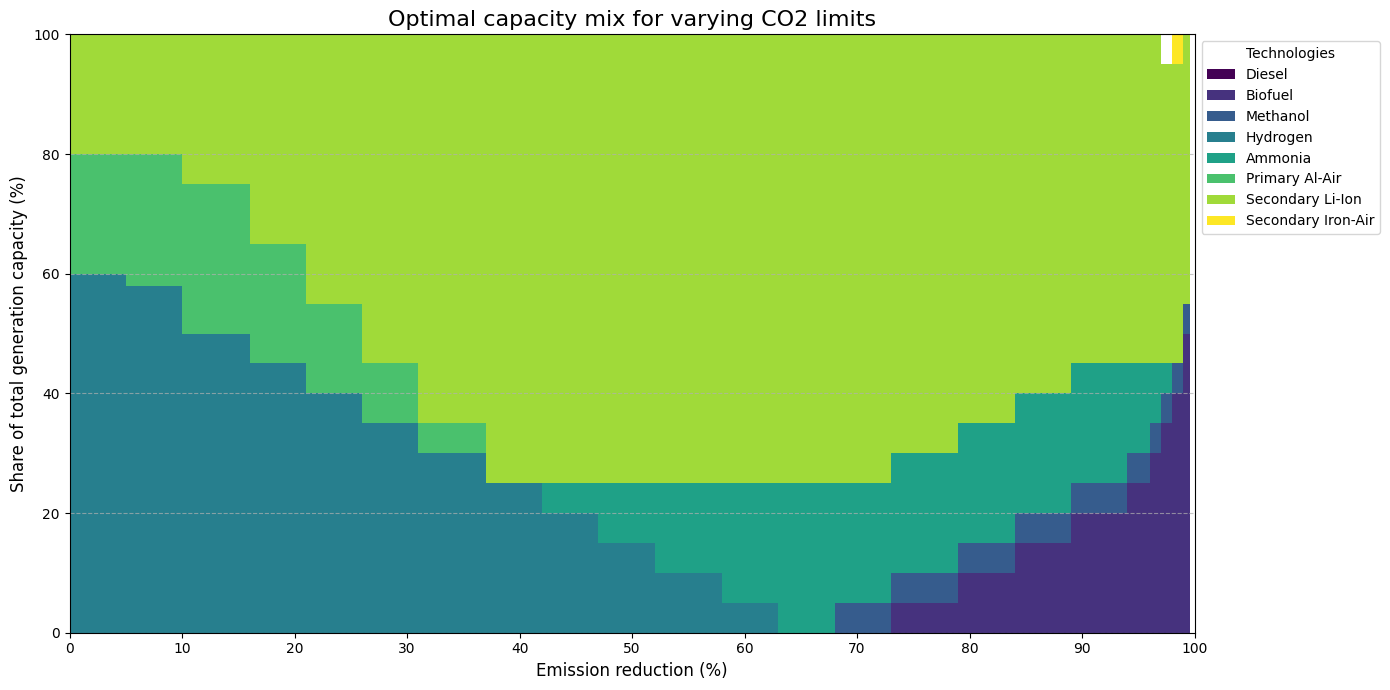

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Data
emission_reduction = [
    0, 5, 10, 16, 21, 26, 31, 37, 42, 47, 52, 58, 63,
    68, 73, 79, 84, 89, 94, 96, 97, 98, 99, 99.6
]  # Continuous values for x-axis

categories = [
    "Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", 
    "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"
]

# Example data: share of each category in total generation capacity per emission reduction target
data = np.array([
    [0, 0, 0, 60, 0, 20, 20, 0],   # 0%
    [0, 0, 0, 58, 0, 22, 20, 0],   # 5%
    [0, 0, 0, 50, 0, 25, 25, 0],   # 10%
    [0, 0, 0, 45, 0, 20, 35, 0],   # 16%
    [0, 0, 0, 40, 0, 15, 45, 0],   # 21%
    [0, 0, 0, 35, 0, 10, 55, 0],   # 26%
    [0, 0, 0, 30, 0, 5, 65, 0],    # 31%
    [0, 0, 0, 25, 0, 0, 75, 0],    # 37%
    [0, 0, 0, 20, 5, 0, 75, 0],    # 42%
    [0, 0, 0, 15, 10, 0, 75, 0],   # 47%
    [0, 0, 0, 10, 15, 0, 75, 0],   # 52%
    [0, 0, 0, 5, 20, 0, 75, 0],    # 58%
    [0, 0, 0, 0, 25, 0, 75, 0],    # 63%
    [0, 0, 5, 0, 20, 0, 75, 0],    # 68%
    [0, 5, 5, 0, 20, 0, 70, 0],    # 73%
    [0, 10, 5, 0, 20, 0, 65, 0],   # 79%
    [0, 15, 5, 0, 20, 0, 60, 0],   # 84%
    [0, 20, 5, 0, 20, 0, 55, 0],   # 89%
    [0, 25, 5, 0, 15, 0, 55, 0],   # 94%
    [0, 30, 5, 0, 10, 0, 55, 0],   # 96%
    [0, 35, 5, 0, 5, 0, 50, 0],    # 97%
    [0, 40, 5, 0, 0, 0, 50, 5],    # 98%
    [0, 50, 5, 0, 0, 0, 45, 5],    # 99%
    [5, 60, 5, 0, 0, 0, 30, 10]    # 99.6%
])

# Calculate bar widths
widths = np.diff(emission_reduction, append=emission_reduction[-1])  # Ensure last bar has width

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

# Generate a color palette from viridis
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plot stacked bars with adjusted widths
for i, category in enumerate(categories):
    for j in range(len(emission_reduction)):
        ax.bar(
            emission_reduction[j], data[j, i], 
            width=widths[j], label=category if j == 0 else "", 
            bottom=bottom[j], color=colors[i], align='edge', edgecolor='none'
        )
    bottom += data[:, i]  # Update bottom for stacking

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Share of total generation capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Format x-axis to show intermediate emission reductions
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Technologies", fontsize=10)

# Grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


0 Run Number Emission Reduction    Diesel   Biofuel Methanol Hydrogen Ammonia  \
1        1.0                0.1  2.083101       0.0      0.0      0.0     0.0   
2        2.0                0.2  2.083101       0.0      0.0      0.0     0.0   
3        3.0                0.3  2.083101       0.0      0.0      0.0     0.0   
4        4.0           0.475064  2.083101       0.0      0.0      0.0     0.0   
5        5.0           0.524236  1.770426  0.311115      0.0      0.0     0.0   

0 Primary Al-Air Secondary Li-Ion Secondary Iron-Air Solar Flexibility  \
1       0.054031              0.0           0.057405   0.0         0.0   
2       0.054031              0.0           0.057405   0.0         0.0   
3       0.054031              0.0           0.057405   0.0         0.0   
4       0.054031              0.0           0.057405   0.0         0.0   
5        0.01021              0.0           0.102786   0.0         0.0   

0 Total Capacity   Total Cost  
1       2.194537  165180.1223  
2   

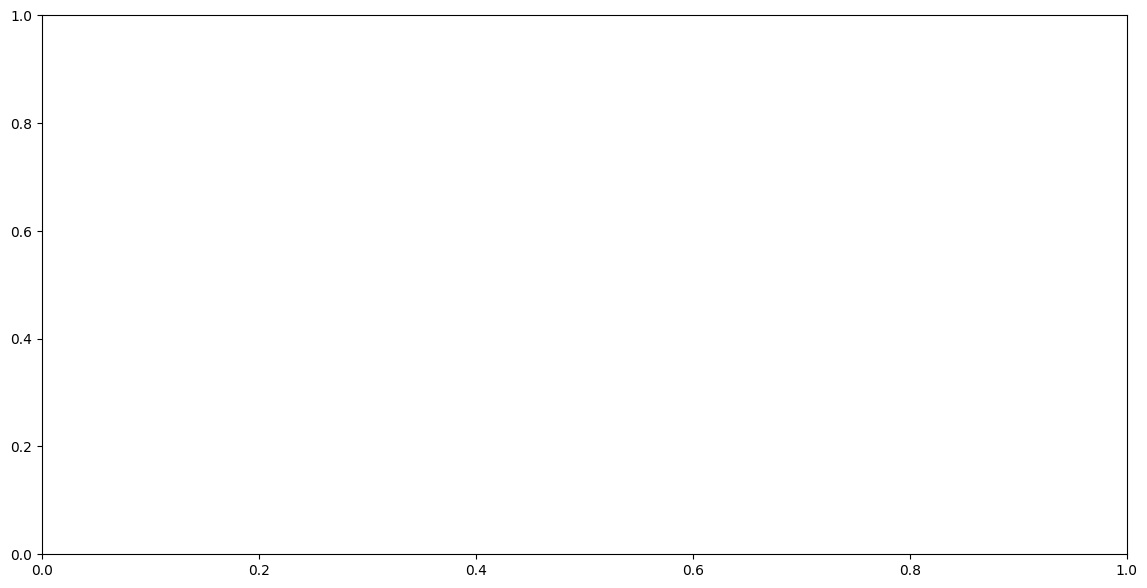

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = "pareto_plot_decarb.csv"
data = pd.read_csv(file_path, header=None)  # Load without assuming header

# Transpose the data to treat each row as a different data series
data = data.T

# Set the first row as the column names
data.columns = data.iloc[0]
data = data[1:]

# Inspect the data after transposing
print(data.head())

# Extract relevant columns
emission_reduction = data["Emission Reduction"]  # Emission Reduction as decimal
categories = ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"]
total_cost = data["Total Cost"]

numeric_columns = [
    "Emission Reduction", "Diesel", "Biofuel", "Methanol", "Hydrogen", 
    "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air", 
    "Total Cost", "Total Capacity"
]

# Apply pd.to_numeric
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Prepare data for stacking
stack_data = data[categories]
stack_data_percentage = stack_data.div(stack_data.sum(axis=1), axis=0) * 100  # Convert to percentages

# Calculate bar widths based on emission reduction differences
x_values = emission_reduction
widths = np.diff(x_values, append=x_values.iloc[-1])

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stacked bars
bottom = np.zeros(len(x_values))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f'
]
print(data.dtypes)

0 Run Number Emission Reduction    Diesel   Biofuel Methanol Hydrogen Ammonia  \
1        1.0                0.1  2.083101       0.0      0.0      0.0     0.0   
2        2.0                0.2  2.083101       0.0      0.0      0.0     0.0   
3        3.0                0.3  2.083101       0.0      0.0      0.0     0.0   
4        4.0           0.475064  2.083101       0.0      0.0      0.0     0.0   
5        5.0           0.524236  1.770426  0.311115      0.0      0.0     0.0   

0 Primary Al-Air Secondary Li-Ion Secondary Iron-Air Solar Flexibility  \
1       0.054031              0.0           0.057405   0.0         0.0   
2       0.054031              0.0           0.057405   0.0         0.0   
3       0.054031              0.0           0.057405   0.0         0.0   
4       0.054031              0.0           0.057405   0.0         0.0   
5        0.01021              0.0           0.102786   0.0         0.0   

0 Total Capacity   Total Cost  
1       2.194537  165180.1223  
2   

KeyError: 0

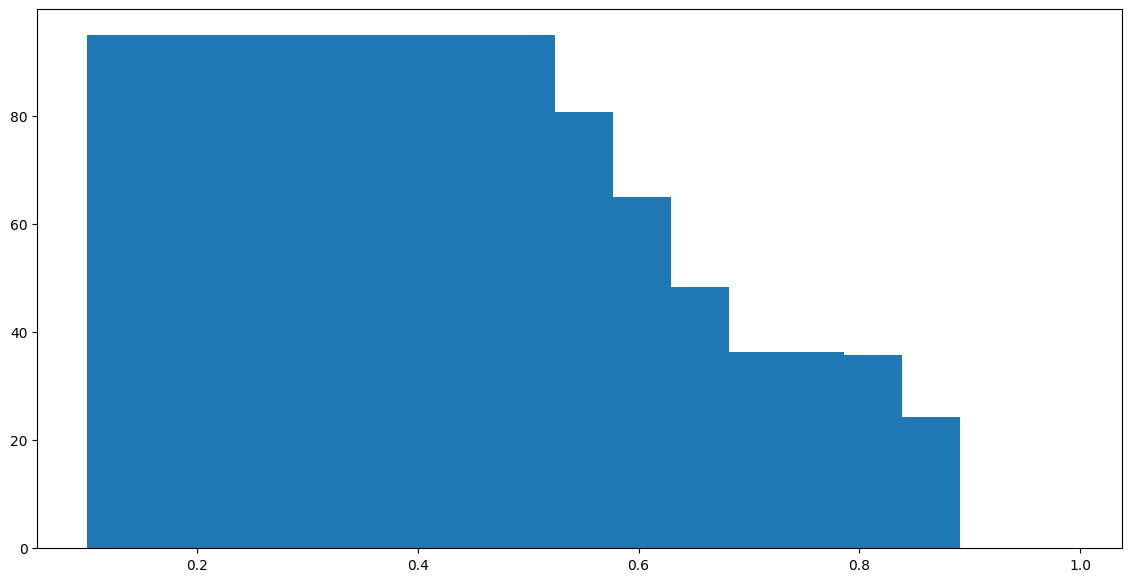

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = "pareto_plot_decarb.csv"
data = pd.read_csv(file_path, header=None)  # Load without assuming header

# Transpose the data to treat each row as a different data series
data = data.T

# Set the first row as the column names
data.columns = data.iloc[0]
data = data[1:]

# Inspect the data after transposing
print(data.head())

# Extract relevant columns
emission_reduction = data["Emission Reduction"]  # Emission Reduction as decimal
categories = ["Diesel", "Biofuel", "Methanol", "Hydrogen", "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air"]
total_cost = data["Total Cost"]

numeric_columns = [
    "Emission Reduction", "Diesel", "Biofuel", "Methanol", "Hydrogen", 
    "Ammonia", "Primary Al-Air", "Secondary Li-Ion", "Secondary Iron-Air", 
    "Total Cost", "Total Capacity"
]

# Apply pd.to_numeric
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Prepare data for stacking
stack_data = data[categories]
stack_data_percentage = stack_data.div(stack_data.sum(axis=1), axis=0) * 100  # Convert to percentages

# Calculate bar widths based on emission reduction differences
x_values = emission_reduction
widths = np.diff(x_values, append=x_values.iloc[-1])

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stacked bars
bottom = np.zeros(len(x_values))
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f'
]

for i, category in enumerate(categories):
    for j in range(len(x_values)):
        ax1.bar(
            x_values.iloc[j], stack_data_percentage[category].iloc[j], 
            width=widths[j], color=colors[i], 
            bottom=bottom[j], align='edge', edgecolor='none'
        )
    bottom += stack_data_percentage[category]

# Add a secondary y-axis for Total Cost
ax2 = ax1.twinx()
ax2.plot(x_values, total_cost, color='black', marker='o', label='Total Cost')
ax2.set_ylabel("Total Cost (units)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Labels and formatting
ax1.set_title("Capacity Mix and System Cost vs. Emission Reduction", fontsize=16)
ax1.set_xlabel("Emission Reduction", fontsize=12)  # Emission Reduction as decimal
ax1.set_ylabel("Share of Total Generation Capacity (%)", fontsize=12)
ax1.set_xlim(x_values.iloc[0], x_values.iloc[-1])
ax1.set_ylim(0, 100)

# Add grid and legend
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(categories + ['Total Cost'], loc='upper left', bbox_to_anchor=(1, 1), title="Technologies")

# Show plot
plt.tight_layout()
plt.show()



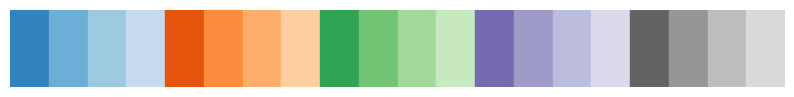

In [1]:
import matplotlib.pyplot as plt

# Display the colors in tab20c
colors = plt.cm.tab20c.colors

# Plot the colors
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, 20)
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()

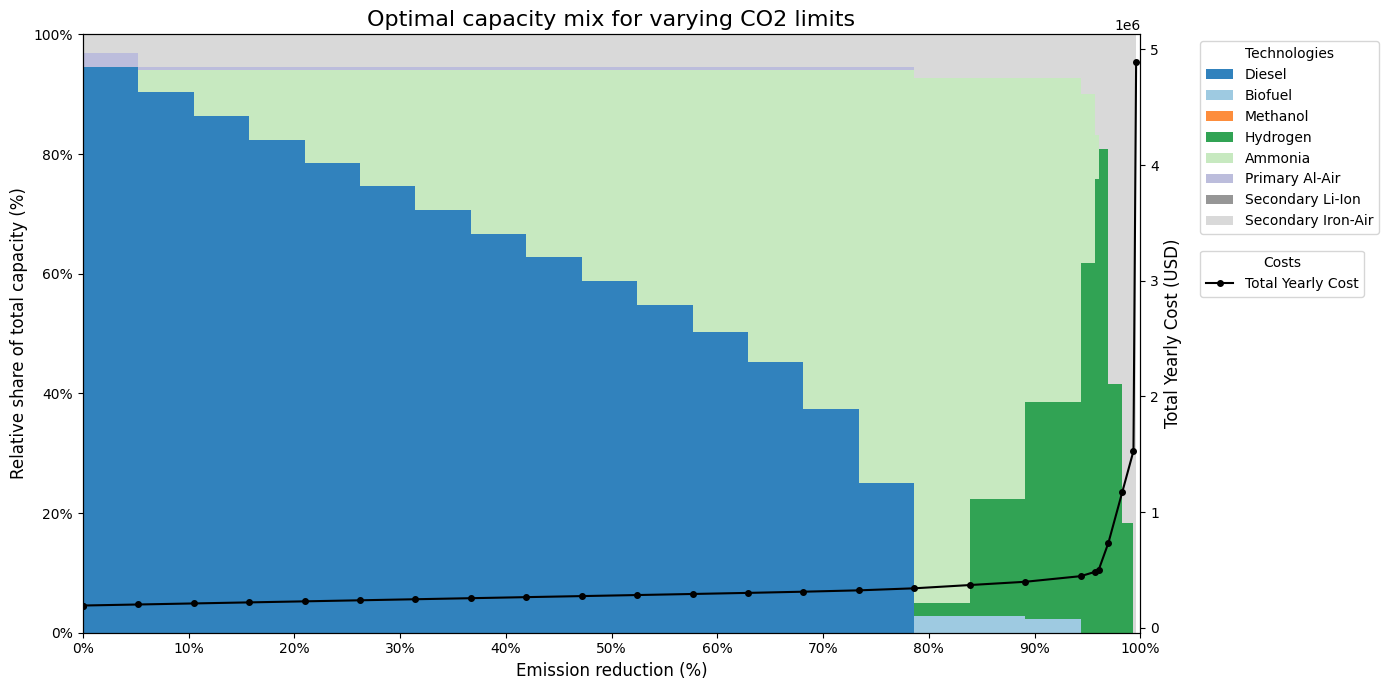

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Load the CSV data into a DataFrame
file_path = 'pareto_plot_decarb.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Transpose and clean the data for plotting
data_transposed = data.set_index('Run Number').T

# Extract emission reduction values
emission_reduction = data_transposed['Emission Reduction'].astype(float).values

# Extract category names and corresponding data
categories = data['Run Number'][1:9]  # Select first 8 categories (Diesel to Secondary Iron-Air)
data_values = data_transposed.iloc[:, 1:9].astype(float).values.T  # Corresponding data for these categories

# Extract Total Cost values
total_cost = data_transposed['Total Cost'].astype(float).values

# Normalize data values to get relative shares (in percentages)
data_sums = data_values.sum(axis=0)  # Total capacities for each emission reduction
data_values = (data_values / data_sums) * 100  # Normalize to percentages

# Calculate bar widths based on consecutive emission reduction differences
widths = np.diff(emission_reduction, append=emission_reduction[-1])  # Last bar extends to the end

# Adjust the first bar to start at 0
emission_reduction = np.insert(emission_reduction, 0, 0)
widths = np.insert(widths, 0, emission_reduction[1])  # Width of the first bar is the distance to the first value
data_values = np.insert(data_values, 0, data_values[:, 0], axis=1)  # Extend the first value
total_cost = np.insert(total_cost, 0, total_cost[0])  # Extend the first Total Cost value

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

# Generate a color palette from tab20c
colors = list(plt.cm.tab20c(np.linspace(0, 1, len(categories))))

# Plot stacked bars with adjusted widths
for i, category in enumerate(categories):
    ax.bar(
        emission_reduction, data_values[i], 
        width=widths, label=category, 
        bottom=bottom, color=colors[i], align='edge', edgecolor='none'
    )
    bottom += data_values[i]  # Update bottom for stacking

# Secondary y-axis for Total Cost
ax2 = ax.twinx()
ax2.plot(emission_reduction, total_cost, color='black', marker='o', markersize=4, label="Total Yearly Cost")
ax2.set_ylabel("Total Yearly Cost (USD)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Relative share of total capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

# Format x-axis and y-axis to show percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Format x-axis to show intermediate emission reductions
ax.set_xticks(np.linspace(0, 1, 11))  # Generate ticks from 0 to 1

# Legend for the bar chart (Technologies)
bars_legend = ax.legend(
    loc='upper left', bbox_to_anchor=(1.05, 1), title="Technologies", fontsize=10
)

# Legend for the line chart (Costs)
cost_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.05, 0.65), title="Costs", fontsize=10
)

# Tight layout for better spacing
plt.tight_layout()
plt.show()




In [ ]:
francesco_colors = {
    'Diesel': '#789cc4',            # Blue
    'Biofuel': '#d0d4ec',           # Gold
    'Methanol': '#f4aa72',          # Red
    'Hydrogen': '#ffb356',          # Green
    'Ammonia': '#f8d1a8',           # Purple
    'Primary Al-Air': '#d6746f',    # Dark Red
    'Secondary Li-Ion': '#86bb78',  # Teal
    'Secondary Iron-Air': '#c2e7b3' # Gray
}

Categories and assigned colors:
Diesel: #b0b0b0
Biofuel: #9ecae1
Methanol: #bcbddc
Hydrogen: #3182bd
Ammonia: #c7e9c0
Primary Al-Air: #fd8d3c
Secondary Li-Ion: #FFD700
Secondary Iron-Air: #31a354


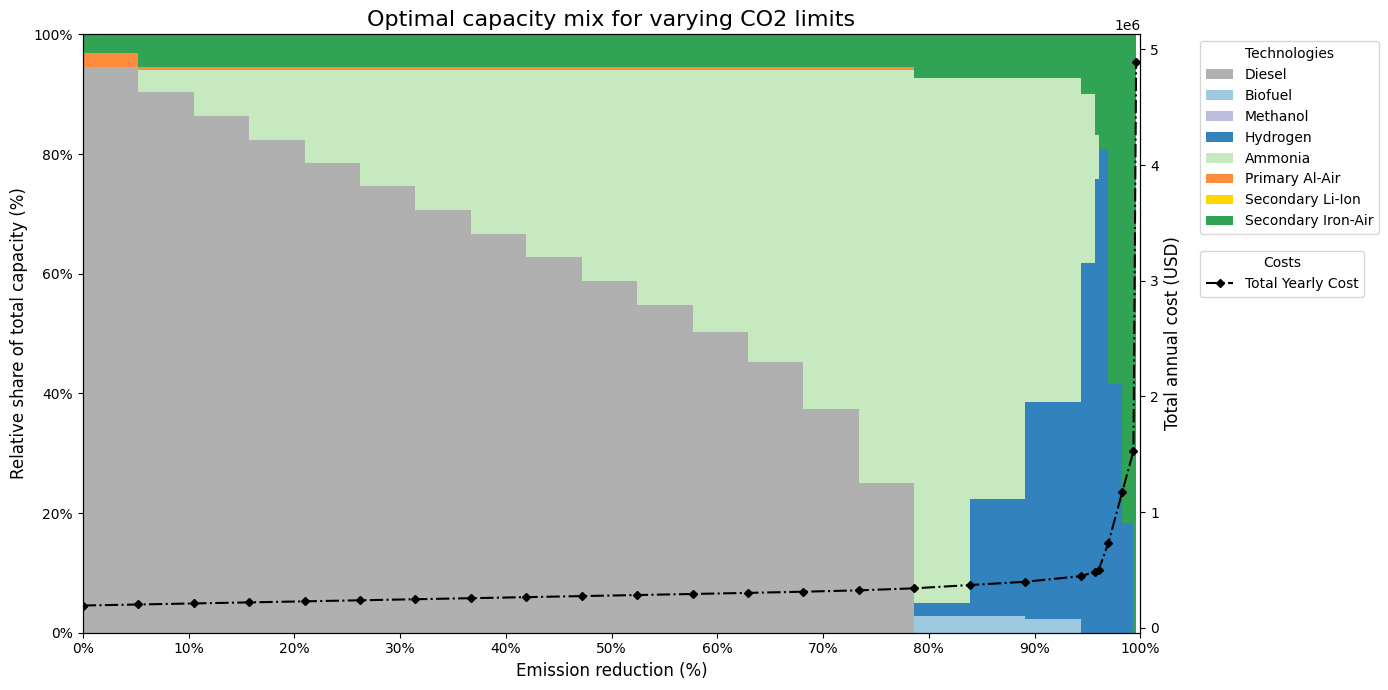

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
import seaborn as sns

technology_colors = {
    'Diesel': '#b0b0b0',           #969696
    'Biofuel': '#9ecae1',        
    'Methanol': '#bcbddc',          
    'Hydrogen': '#3182bd',         
    'Ammonia': '#c7e9c0',           
    'Primary Al-Air': '#fd8d3c',    
    'Secondary Li-Ion': '#FFD700',  
    'Secondary Iron-Air': '#31a354' 
} 

# Load the CSV data into a DataFrame
file_path = 'pareto_plot_decarb.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Transpose and clean the data for plotting
data_transposed = data.set_index('Run Number').T

# Extract emission reduction values
emission_reduction = data_transposed['Emission Reduction'].astype(float).values

# Extract category names and corresponding data
categories = data['Run Number'][1:9]  # Select first 8 categories (Diesel to Secondary Iron-Air)
data_values = data_transposed.iloc[:, 1:9].astype(float).values.T  # Corresponding data for these categories

# Extract Total Cost values
total_cost = data_transposed['Total Cost'].astype(float).values

# Normalize data values to get relative shares (in percentages)
data_sums = data_values.sum(axis=0)  # Total capacities for each emission reduction
data_values = (data_values / data_sums) * 100  # Normalize to percentages

# Calculate bar widths based on consecutive emission reduction differences
widths = np.diff(emission_reduction, append=emission_reduction[-1])  # Last bar extends to the end

# Adjust the first bar to start at 0
emission_reduction = np.insert(emission_reduction, 0, 0)
widths = np.insert(widths, 0, emission_reduction[1])  # Width of the first bar is the distance to the first value
data_values = np.insert(data_values, 0, data_values[:, 0], axis=1)  # Extend the first value
total_cost = np.insert(total_cost, 0, total_cost[0])  # Extend the first Total Cost value

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(emission_reduction))  # Start at 0 for stacking

# Debugging: Print categories and their assigned colors
print("Categories and assigned colors:")
for category in categories:
    color = technology_colors.get(category)  # Default to light gray if not in dictionary
    print(f"{category}: {color}")

# Plot stacked bars with manually defined colors
for i, category in enumerate(categories):
    color = technology_colors.get(category, '#d3d3d3')  # Default to light gray if not in dictionary
    ax.bar(
        emission_reduction, data_values[i], 
        width=widths, label=category, 
        bottom=bottom, color=color, align='edge', edgecolor='none'
    )
    bottom += data_values[i]  # Update bottom for stacking

# Secondary y-axis for Total Cost
ax2 = ax.twinx()
ax2.plot(emission_reduction, total_cost, color='black', marker='D', linestyle='-.', markersize=4, label="Total Yearly Cost") #  marker='^', linestyle=':', marker='s', linestyle='-',
ax2.set_ylabel("Total annual cost (USD)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Relative share of total capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

# Format x-axis and y-axis to show percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Format x-axis to show intermediate emission reductions
ax.set_xticks(np.linspace(0, 1, 11))  # Generate ticks from 0 to 1

# Legend for the bar chart (Technologies)
bars_legend = ax.legend(
    loc='upper left', bbox_to_anchor=(1.05, 1), title="Technologies", fontsize=10
)

# Legend for the line chart (Costs)
cost_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.05, 0.65), title="Costs", fontsize=10
)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


Categories and assigned colors:
Diesel: #969696
Biofuel: #9ecae1
Methanol: #bcbddc
Hydrogen: #3182bd
Ammonia: #c7e9c0
Primary Al-Air: #fd8d3c
Secondary Li-Ion: #FFD700
Secondary Iron-Air: #31a354


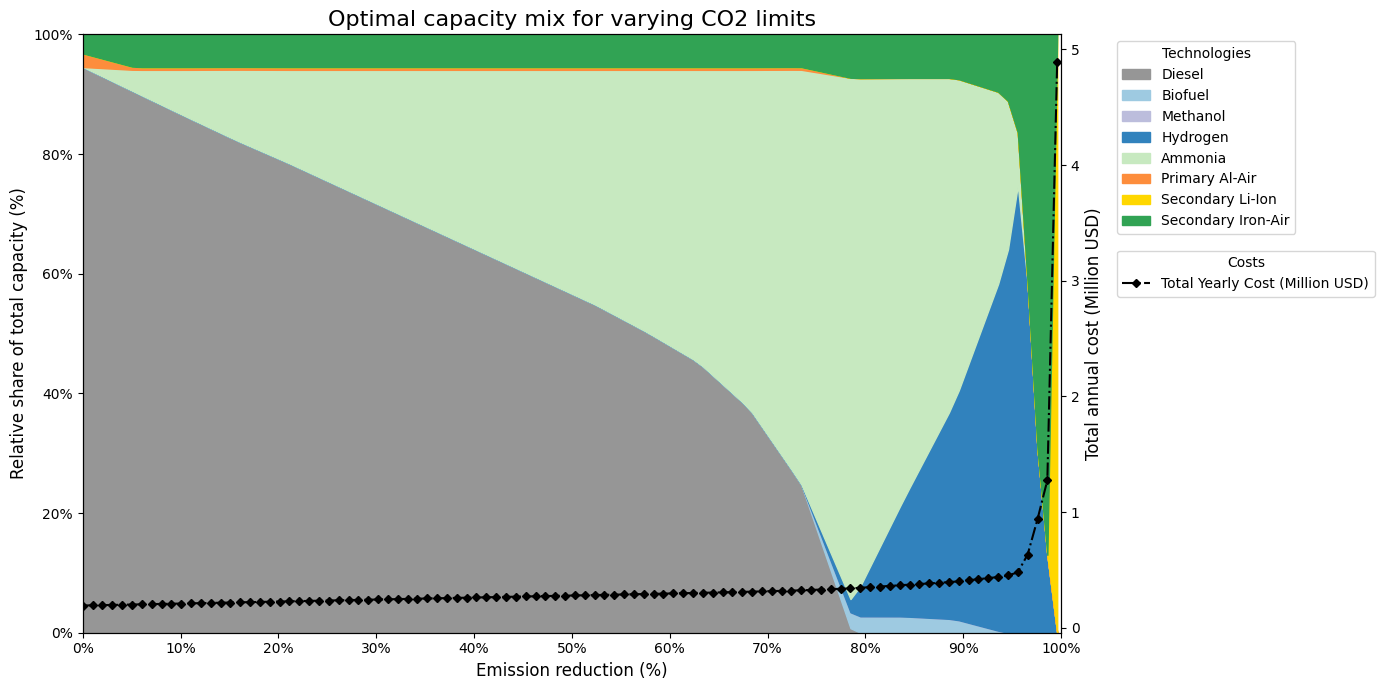

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import interp1d

# Load the CSV data into a DataFrame
file_path = 'pareto_plot_decarb.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Transpose and clean the data for plotting
data_transposed = data.set_index('Run Number').T

# Extract emission reduction values
emission_reduction = data_transposed['Emission Reduction'].astype(float).values

# Extract category names and corresponding data
categories = data['Run Number'][1:9]  # Select first 8 categories (Diesel to Secondary Iron-Air)
data_values = data_transposed.iloc[:, 1:9].astype(float).values.T  # Corresponding data for these categories

# Extract Total Cost values
total_cost = data_transposed['Total Cost'].astype(float).values

# Normalize data values to get relative shares (in percentages)
data_sums = data_values.sum(axis=0)  # Total capacities for each emission reduction
data_values = (data_values / data_sums) * 100  # Normalize to percentages

num_points = 100  # Adjust this value as needed (e.g., 100 for coarse, 1000 for fine)

# Interpolate data for smoother plotting
fine_emission_reduction = np.linspace(emission_reduction.min(), emission_reduction.max(), num_points)
data_values_interpolated = np.zeros((data_values.shape[0], len(fine_emission_reduction)))

# Use linear interpolation for each category
for i in range(data_values.shape[0]):
    f_interp = interp1d(emission_reduction, data_values[i], kind='linear')
    data_values_interpolated[i] = f_interp(fine_emission_reduction)

# Interpolate total cost
f_cost_interp = interp1d(emission_reduction, total_cost / 1_000_000, kind='linear')  # Convert to Million USD
total_cost_interpolated = f_cost_interp(fine_emission_reduction)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(fine_emission_reduction))  # Start at 0 for stacking

# Debugging: Print categories and their assigned colors
print("Categories and assigned colors:")
for category in categories:
    color = technology_colors.get(category)  # Default to light gray if not in dictionary
    print(f"{category}: {color}")

# Plot stacked areas using fill_between
for i, category in enumerate(categories):
    color = technology_colors.get(category, '#d3d3d3')  # Default to light gray if not in dictionary
    ax.fill_between(
        fine_emission_reduction,
        bottom,
        bottom + data_values_interpolated[i],
        label=category,
        color=color
    )
    bottom += data_values_interpolated[i]  # Update bottom for stacking

# Secondary y-axis for Total Cost
ax2 = ax.twinx()
ax2.plot(
    fine_emission_reduction, total_cost_interpolated, 
    color='black', marker='D', linestyle='-.', markersize=4, label="Total Yearly Cost (Million USD)"
)
ax2.set_ylabel("Total annual cost (Million USD)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customization
ax.set_title("Optimal capacity mix for varying CO2 limits", fontsize=16)
ax.set_ylabel("Relative share of total capacity (%)", fontsize=12)
ax.set_xlabel("Emission reduction (%)", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 100)

# Format x-axis and y-axis to show percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Format x-axis to show intermediate emission reductions
ax.set_xticks(np.linspace(0, 1, 11))  # Generate ticks from 0 to 1

# Legend for the stacked areas (Technologies)
bars_legend = ax.legend(
    loc='upper left', bbox_to_anchor=(1.05, 1), title="Technologies", fontsize=10
)

# Legend for the line chart (Costs)
cost_legend = ax2.legend(
    loc='upper left', bbox_to_anchor=(1.05, 0.65), title="Costs", fontsize=10
)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [9]:
colorsss = technology_colors.get("Diesel")
print(colorsss)

#1f77b4


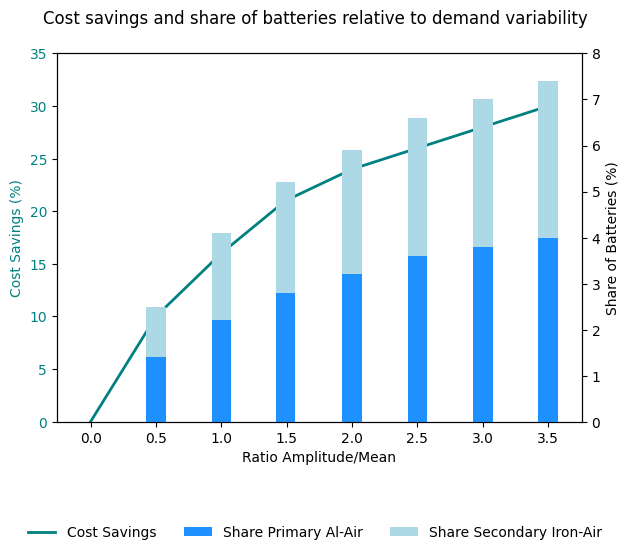

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the plot
x = [0, 0.5, 1, 1.49, 2, 2.5, 3, 3.5]  # Ratio Amplitude/Mean
cost_savings = [0, 10, 16, 21, 24, 26, 28, 30]  # Cost Savings (%)
share_primary = [0.0, 1.4, 2.2, 2.8, 3.2, 3.6, 3.8, 4.0]  # Updated Share Primary Al-Air (%)
share_secondary = [0.0, 1.1, 1.9, 2.4, 2.7, 3.0, 3.2, 3.4]

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot cost savings
ax1.plot(x, cost_savings, label="Cost Savings", color="teal", linewidth=2)
ax1.set_xlabel("Ratio Amplitude/Mean")
ax1.set_ylabel("Cost Savings (%)", color="teal")
ax1.tick_params(axis='y', labelcolor="teal")
ax1.set_ylim(0, 35)

# Create twin axis for battery share
ax2 = ax1.twinx()
bar_width = 0.3  # Increased bar width
ax2.bar(x, share_primary, width=0.15, label="Share Primary Al-Air", color="dodgerblue")
ax2.bar(x, share_secondary, width=0.15, label="Share Secondary Iron-Air", color="lightblue", bottom=share_primary)
ax2.set_ylabel("Share of Batteries (%)")
ax2.set_ylim(0, 8)

# Title and legends
fig.suptitle("Cost savings and share of batteries relative to demand variability")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

# Show plot
plt.tight_layout()
plt.show()


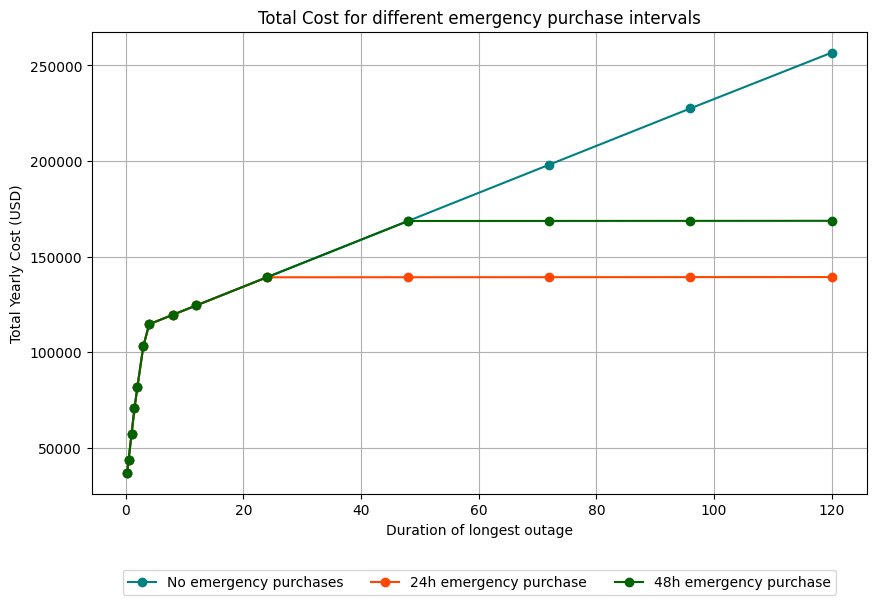

In [19]:
import matplotlib.pyplot as plt

# Data from the table
duration = [0.25, 0.5, 1, 1.5, 2, 3, 4, 8, 12, 24, 48, 72, 96, 120]
no_emergency = [36934.75569, 43676.39846, 57159.68401, 70642.96955, 81826.42965,
                 103059.4395, 114598.6023, 119509.161, 124419.7198, 139151.3959,
                 168614.7483, 198078.1007, 227541.4531, 256698.0074]
h24_emergency = [36934.75569, 43676.39846, 57159.68401, 70642.96955, 81826.42965,
                  103059.4395, 114598.6023, 119509.161, 124419.7198, 139151.3959,
                  139180.8088, 139210.2216, 139239.6345, 139269.0473]
h48_emergency = [36934.75569, 43676.39846, 57159.68401, 70642.96955, 81826.42965,
                  103059.4395, 114598.6023, 119509.161, 124419.7198, 139151.3959,
                  168614.7483, 168643.9666, 168673.574, 168702.7923]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(duration, no_emergency, marker='o', color='teal', label='No emergency purchases')
plt.plot(duration, h24_emergency, marker='o', color='orangered', label='24h emergency purchase')
plt.plot(duration, h48_emergency, marker='o', color='darkgreen', label='48h emergency purchase')

# Customize the plot
plt.xlabel('Duration of longest outage')
plt.ylabel('Total Yearly Cost (USD)')
plt.title('Total Cost for different emergency purchase intervals')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)

# Show the plot
plt.show()